<a href="https://colab.research.google.com/github/KshitijShinde/Skill/blob/main/expt_8_anova_and_information_gain_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Wine Quality dataset directly from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, delimiter=';')

# Overview of the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


                 Feature     F-Score        p-value
10               alcohol  115.854797  1.209895e-104
1       volatile acidity   60.913993   3.326465e-58
6   total sulfur dioxide   25.478510   8.533598e-25
9              sulphates   22.273376   1.225890e-21
2            citric acid   19.690664   4.421092e-19
7                density   13.396357   8.124395e-13
0          fixed acidity    6.283081   8.793967e-06
4              chlorides    6.035639   1.526539e-05
5    free sulfur dioxide    4.754233   2.570827e-04
8                     pH    4.341764   6.284389e-04
3         residual sugar    1.053374   3.846188e-01


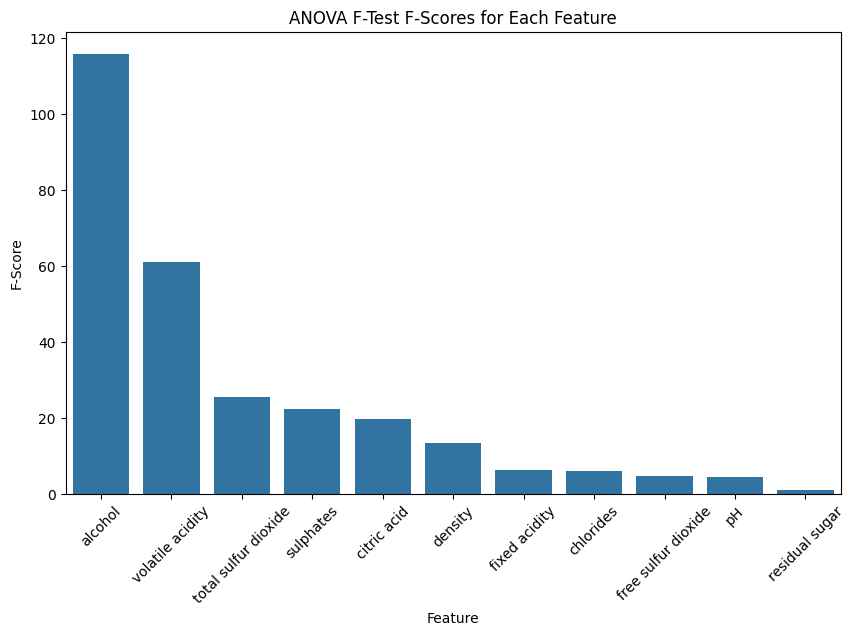

In [ ]:
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = df.drop(columns='quality')
y = df['quality']

# Perform ANOVA F-test
f_scores, p_values = f_classif(X, y)

# Results as DataFrame
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'p-value': p_values})
anova_results = anova_results.sort_values(by='F-Score', ascending=False)

# Display ANOVA results
print(anova_results)

# Plotting the F-scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='F-Score', data=anova_results)
plt.xticks(rotation=45)
plt.title('ANOVA F-Test F-Scores for Each Feature')
plt.savefig('anova_f_scores.png')
plt.show()

Information Gain

                 Feature  Information Gain
10               alcohol          0.173946
9              sulphates          0.117617
1       volatile acidity          0.108415
6   total sulfur dioxide          0.092818
7                density          0.067277
2            citric acid          0.059825
0          fixed acidity          0.050661
4              chlorides          0.044360
5    free sulfur dioxide          0.038010
8                     pH          0.023608
3         residual sugar          0.010180


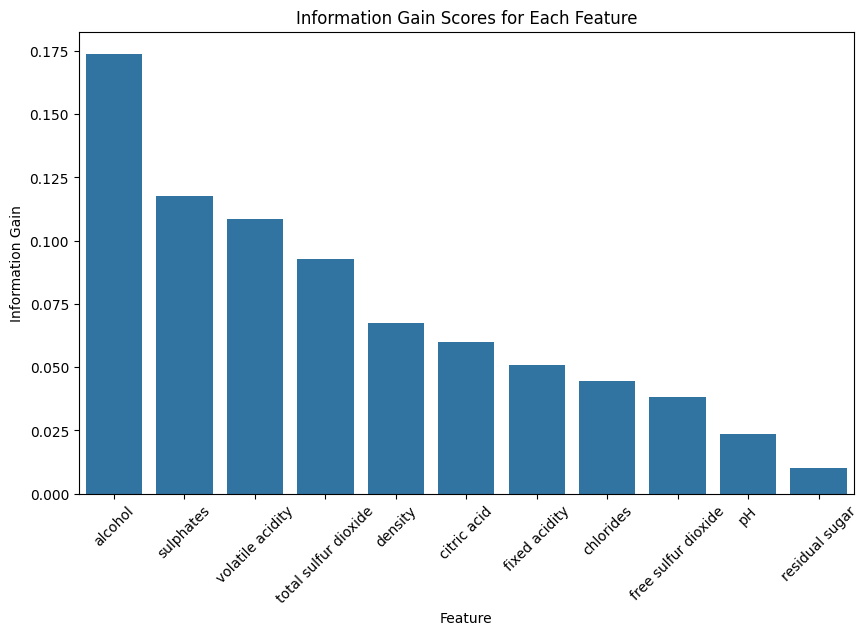

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute Information Gain
information_gain = mutual_info_classif(X, y)

# Results as DataFrame
information_gain_results = pd.DataFrame({'Feature': X.columns, 'Information Gain': information_gain})
information_gain_results = information_gain_results.sort_values(by='Information Gain', ascending=False)

# Display Information Gain results
print(information_gain_results)

# Plotting the Information Gain scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Information Gain', data=information_gain_results)
plt.xticks(rotation=45)
plt.title('Information Gain Scores for Each Feature')
plt.savefig('information_gain.png')
plt.show()